Simulate forcing XPK pathway in the iRhtoC model. Use PKETF_c reaction because it doesn’t have the XPK. And observe what happens with ACL. 
* You can  make a graph with flux of PKETF_c (phosphoketolase (fructose 6-phosphate)) on y axis and ACL on x axis, if you do forcing simulations in few steps. You will obtain like a linear line. 
* FBA params: I suggest Glc max at 0.05 GR and another round for 0.3 GR. 
* And extract cofactor balances, and compare how it changes when FPK is forced to have a flux. Especially NADH.

In [1]:
import cobra 
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

In [2]:
# Importing the model
model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\iRhto_models\\iRhtoC.xml")

model1.objective = "EX_glc__D_e"  

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


In [3]:
# Lab data
# glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 2.6619851, 3.1] # the fifth glc uptake value was calculated
growth_rates = [0.049, 0.100, 0.151, 0.203, 0.25, 0.301]
# PKETF_bounds =   [0.181042, 0.440304, 0.729, 0.81, 1.069314, 1.247297]
PKETF_bounds = [0.270275, 0.551582, 0.832889, 1.119712, 1.378955, 1.660262]

solution1 = model1.optimize()
# All fluxes
all_fluxes = solution1.fluxes.to_frame(name='Flux')
all_fluxes

,Flux
RLFC2O_c,0.0
RLFC2O_m,0.0
BTDDH_c,0.0
LLFC2O_c,0.0
13GS_c,0.0
...,...
ECOAI82e_x,0.0
DECOAI82e_x,0.0
DECOAR82e_x,0.0
ECOAI81e_x,0.0


In [4]:
# Get all fluxes on different growth rate
all_fluxes_glc_max = pd.DataFrame(columns=['Glucose uptake', 'Biomass growth rate',  *all_fluxes.index], index=range(len(growth_rates))) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(growth_rates)):
    model = cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\iRhto_models\\iRhtoC.xml")
    model.reactions.EX_glc__D_e.bounds = -9999, 9999
    model.reactions.BIOMASS_RT_CLIM.bounds = growth_rates[i], growth_rates[i]
    # model.reactions.ACITL_c.bounds = 0, 0
    # model.reactions.PKETF_c.bounds = PKETF_bounds[i], PKETF_bounds[i]
    
    model.objective = "EX_glc__D_e"
    solution = model.optimize()
    
    all_fluxes_glc_max.loc[i] = solution.fluxes[['EX_glc__D_e', 'BIOMASS_RT_CLIM', *all_fluxes.index]].values

all_fluxes_glc_max

,Glucose uptake,Biomass growth rate,RLFC2O_c,RLFC2O_m,BTDDH_c,LLFC2O_c,13GS_c,16GS_c,PRMICI_c,P5CD_m,...,ECOAH101e_x,HACD101ei_x,ACACT101ei_x,ACOAD82ef_x,ACOAO82e_x,ECOAI82e_x,DECOAI82e_x,DECOAR82e_x,ECOAI81e_x,PACCOAE_x
0,-0.672576,0.049,0.0,0.0,0.0,0.0,0.049055,0.012909,0.003739,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.339692,0.1,0.0,0.0,0.0,0.0,0.100112,0.026345,0.00763,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.006807,0.151,0.0,0.0,0.0,0.0,0.15117,0.039782,0.011522,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.687003,0.203,0.0,0.0,0.0,0.0,0.203228,0.053481,0.015489,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.301795,0.25,0.0,0.0,0.0,0.0,0.250281,0.065864,0.019075,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-3.968911,0.301,0.0,0.0,0.0,0.0,0.301338,0.0793,0.022967,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = all_fluxes_glc_max[['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']]
exchange_fluxes_table

,EX_glc__D_e,EX_o2_e,EX_nh4_e,EX_so4_e,EX_pi_e,EX_co2_e
0,-0.672576,-1.79109,-0.316439,-0.004024,-0.026383,1.987798
1,-1.339692,-3.457808,-0.645795,-0.008213,-0.053842,3.859252
2,-2.006807,-5.124526,-0.97515,-0.012401,-0.081302,5.730707
3,-2.687003,-6.823924,-1.310963,-0.016672,-0.1093,7.638856
4,-3.301795,-8.359919,-1.614487,-0.020532,-0.134605,9.36353
5,-3.968911,-10.026637,-1.943842,-0.024721,-0.162065,11.234985


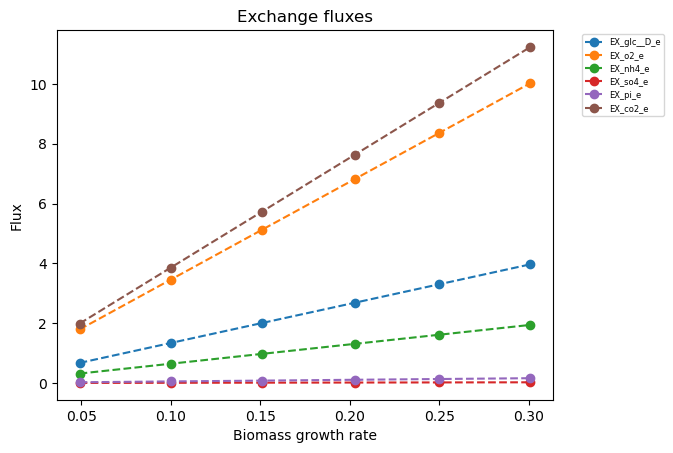

In [6]:
# Exchange fluxes plot
plt.plot(growth_rates, np.abs(exchange_fluxes_table[exchange_fluxes_table.columns]), 'o--', label = exchange_fluxes_table.columns)

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title("Exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.yticks(range(0, 20, 1))
plt.show()

In [7]:
PPP_fluxes = all_fluxes_glc_max[['BIOMASS_RT_CLIM', 'EX_glc__D_e', 'PKETF_c','G6PDH2i_c', 'TKT1_c', 'TALA_c','TKT2_c', 'PYRDC_c','PDH_m']] #'XPK' (Xylulose-5-phosphate phosphoketolase) and 'FPK' (Fructose-6-phosphate phosphoketolase) - couldnt find these from iRhto model 
# Change G6PDH2rp column name to oxpp 
PPP_fluxes = PPP_fluxes.rename(columns = {'G6PDH2i_c': 'oxpp'})
PPP_fluxes

,BIOMASS_RT_CLIM,EX_glc__D_e,PKETF_c,oxpp,TKT1_c,TALA_c,TKT2_c,PYRDC_c,PDH_m
0,0.049,-0.672576,0.0,0.353329,0.116176,0.116176,0.103821,0.0,0.738091
1,0.1,-1.339692,0.0,0.721081,0.237093,0.237093,0.21188,0.0,1.440482
2,0.151,-2.006807,0.0,1.088832,0.358011,0.358011,0.319938,0.0,2.142874
3,0.203,-2.687003,0.0,1.463793,0.481299,0.481299,0.430115,0.0,2.859037
4,0.25,-3.301795,0.0,1.802701,0.592733,0.592733,0.529699,0.0,3.506339
5,0.301,-3.968911,0.0,2.170452,0.713651,0.713651,0.637757,0.0,4.20873


In [8]:
ATPM_ACITL_fluxes = all_fluxes_glc_max[['ATPM_c', 'ACITL_c', 'ACS_n']] #ACS - Acetyl-CoA synthetase
ATPM_ACITL_fluxes

,ATPM_c,ACITL_c,ACS_n
0,1.189,0.270275,0.0
1,1.189,0.551582,0.0
2,1.189,0.832889,0.0
3,1.189,1.119712,0.0
4,1.189,1.378955,0.0
5,1.189,1.660262,0.0


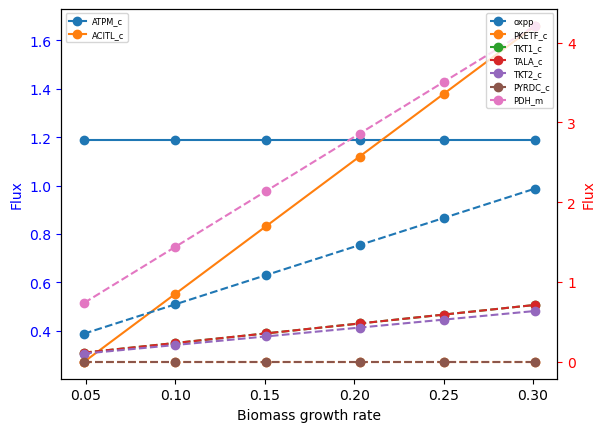

In [9]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis
# Sample data
x = growth_rates
y1 = np.abs(ATPM_ACITL_fluxes[['ATPM_c', 'ACITL_c']])
y2 = np.abs(PPP_fluxes[['oxpp', 'PKETF_c', 'TKT1_c', 'TALA_c', 'TKT2_c', 'PYRDC_c','PDH_m']])

# # Define colors for each label
# colors = {'ATPM': 'black', 'ACITL': 'orange', 'oxpp': 'yellow', 'TKT1': 'green', 'TKT2': 'blue', 'TALA': 'red', 'XPK': 'pink','PYRDC': 'brown' ,'PDHm': 'purple'}
# labels = ['ATPM', 'ACITL', 'oxpp', 'TKT1', 'TKT2', 'TALA', 'XPK','PYRDC','PDHm']
# Create the first plot
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'o-', label=['ATPM_c', 'ACITL_c'])
ax1.set_xlabel('Biomass growth rate')
ax1.set_ylabel('Flux', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(fontsize=6, loc='upper left')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis 
ax2.plot(x, y2, 'o--', label=['oxpp', 'PKETF_c', 'TKT1_c', 'TALA_c', 'TKT2_c', 'PYRDC_c','PDH_m'])
ax2.set_ylabel('Flux', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()

Text(0.5, 1.0, 'ATP citrate lyase vs phosphoketolase (fructose 6-phosphate)')

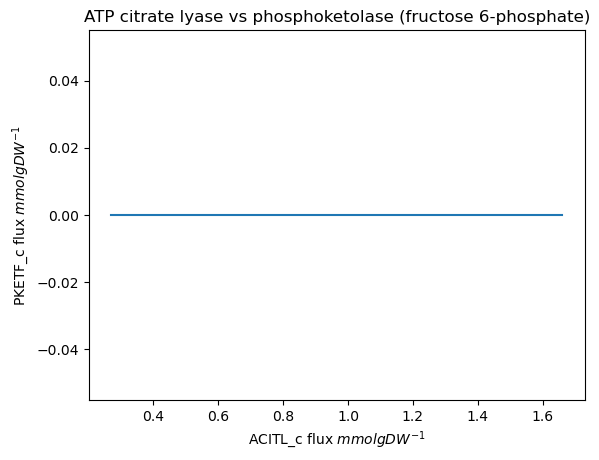

In [10]:
# PKETF_c on y and ACITL on x

plt.plot(ATPM_ACITL_fluxes['ACITL_c'], PPP_fluxes['PKETF_c'], '-')
plt.xlabel(r'ACITL_c flux $mmol gDW^{−1}$')
plt.ylabel(r'PKETF_c flux $mmol gDW^{−1}$')
plt.title('ATP citrate lyase vs phosphoketolase (fructose 6-phosphate)')


COFACTOR BALANCES

In [11]:
# Cofactor lists
nadphs = ['nadph_c', 'nadph_l', 'nadph_m', 'nadph_r', 'nadph_rm','nadph_x']
nadhs = ['nadh_c', 'nadh_m', 'nadh_x', 'nadh_r', 'nadh_rm']
atps = ['atp_c', 'atp_m', 'atp_n', 'atp_r', 'atp_en', 'atp_gm', 'atp_l', 'atp_rm', 'atp_vm', 'atp_x'] 

# Make a function for getting cofactor fluxes (all reactions where given metabolite is and their fluxes)

def cofactor_all_rxn_fluxes(cofactor_list, i):
    producing_fluxes = pd.DataFrame() 
    consuming_fluxes = pd.DataFrame()
    
    model = cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\iRhto_models\\iRhtoC.xml")
    model.reactions.EX_glc__D_e.bounds = -9999, 9999
    model.reactions.BIOMASS_RT_CLIM.bounds = growth_rates[i], growth_rates[i]
    model.reactions.PKETF_c.bounds = PKETF_bounds[i], PKETF_bounds[i]
    
    model.objective = "EX_glc__D_e"
    solution = model.optimize()

    biomass_GR = solution.objective_value
    print(f'Biomass growth rate: {biomass_GR}')
    for metabolite in cofactor_list:
        producing_fluxes = pd.concat([producing_fluxes, getattr(model.metabolites, metabolite).summary().producing_flux])
        consuming_fluxes = pd.concat([consuming_fluxes, getattr(model.metabolites, metabolite).summary().consuming_flux])
    
    for reaction in producing_fluxes.index:
        if reaction in consuming_fluxes.index and abs(round(producing_fluxes.loc[reaction, 'flux'], 3)) == abs(round(consuming_fluxes.loc[reaction, 'flux'], 3)):
            producing_fluxes = producing_fluxes.drop([reaction])
            consuming_fluxes = consuming_fluxes.drop([reaction])
            
    cofactor_fluxes = pd.concat([producing_fluxes, consuming_fluxes])

    cofactor_fluxes = cofactor_fluxes.sort_values(by='flux', ascending=False).drop(columns = ['percent']) # drop percent column, bc these percents are not for nadph sum (the percent is for specific compartment)
    cofactor_fluxes = cofactor_fluxes[(cofactor_fluxes['flux']) != 0.0] # for getting non-zero fluxes only

    cofactor_sum_producing_flux = sum(cofactor_fluxes[cofactor_fluxes['flux'] > 0]['flux']) # for getting the sum of producing fluxes
    cofactor_sum_consuming_flux = sum(cofactor_fluxes[cofactor_fluxes['flux'] < 0]['flux']) # for getting the sum of consumed fluxes
    print(f'SUM produced: {cofactor_sum_producing_flux}, SUM consumed: {cofactor_sum_consuming_flux}')

    if round(cofactor_sum_producing_flux, 3) == round(abs(cofactor_sum_consuming_flux), 3):
        cofactor_fluxes['percent'] = abs(cofactor_fluxes['flux']/cofactor_sum_producing_flux) # add percent column

    return cofactor_fluxes

# Making a pie chart
def cofactor_fluxes_pie_chart(cofactor_fluxes,  title, threshold): # threshold shows the percent of the flux for including in others sector on pie chart 
    import plotly.graph_objects as go
    # The three lines below are for grouping together reactions with low fluxes in producing
    producing_cofactor_fluxes_draw = cofactor_fluxes[(cofactor_fluxes['flux'] > 0).copy()]    
    producing_cofactor_fluxes_draw.loc[producing_cofactor_fluxes_draw['percent'] < threshold, 'reaction'] = 'Other producing'
    producing_cofactor_fluxes_draw = producing_cofactor_fluxes_draw.groupby('reaction')[['percent', 'flux']].sum()        
    
    # The three lines below are for grouping together reactions with low fluxes in consuming 
    consuming_cofactor_fluxes_draw = cofactor_fluxes[(cofactor_fluxes['flux'] < 0).copy()]
    consuming_cofactor_fluxes_draw.loc[consuming_cofactor_fluxes_draw['percent'] < threshold, 'reaction'] = 'Other consuming'
    consuming_cofactor_fluxes_draw = consuming_cofactor_fluxes_draw.groupby('reaction')[['percent', 'flux']].sum()
    
    # y_producing = producing_cofactor_fluxes_draw['percent']
    # labels_producing = producing_cofactor_fluxes_draw[['reaction', 'flux']] 
    
    # y_consuming = abs(consuming_cofactor_fluxes_draw['percent'])
    # labels_consuming = consuming_cofactor_fluxes_draw[['reaction', 'flux']]
    
    producing_and_consuming_fluxes = pd.concat([producing_cofactor_fluxes_draw, consuming_cofactor_fluxes_draw])
    
    # reaction_IDs = pd.concat([labels_producing, labels_consuming])
    model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\iRhto_models\\iRhtoC.xml")
    model.objective = "EX_glc__D_e" 
    solution = model.optimize('maximize')  
    
    reaction_names_w_flux = []
    for reaction in producing_and_consuming_fluxes.index:
        if reaction != 'Other producing' and reaction != 'Other consuming':
            reaction_names_w_flux += [', '.join([''.join([str(round((producing_and_consuming_fluxes.loc[reaction, 'percent'])*100, 1)),'%']), getattr(model.reactions, reaction).name, str(round(producing_and_consuming_fluxes.loc[reaction, 'flux'], 3))])]
        elif reaction == 'Other producing':
            reaction_names_w_flux += [', '.join([''.join([str(round((producing_and_consuming_fluxes.loc[reaction, 'percent'])*100, 1)),'%']), 'Other producing', str(round(producing_and_consuming_fluxes.loc[reaction, 'flux'], 3))])] 
        elif reaction == 'Other consuming':
            reaction_names_w_flux += [', '.join([''.join([str(round((producing_and_consuming_fluxes.loc[reaction, 'percent'])*100, 1)),'%']), 'Other consuming', str(round(producing_and_consuming_fluxes.loc[reaction, 'flux'], 3))])] 
            
    pie_chart = plt.pie(producing_and_consuming_fluxes.loc[:, 'percent'], labels = reaction_names_w_flux)  #autopct='%1.1f%%' pd.concat([producing_cofactor_fluxes_draw, consuming_cofactor_fluxes_draw])[['flux', 'percent']]
    # plt.legend(producing_and_consuming_fluxes, reaction_names_w_flux, title = 'Reaction names', loc="center left",  bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(title)
    
    return pie_chart


In [12]:
# Get nadph fluxes at lowest biomass growth rate

nadph_fluxes_lowest_GR = cofactor_all_rxn_fluxes(nadphs, 0)
nadph_fluxes_lowest_GR

# Get nadph fluxes at highest biomass growth rate

nadph_fluxes_highest_GR = cofactor_all_rxn_fluxes(nadphs, 5)
nadph_fluxes_highest_GR

# Get nadh fluxes at lowest biomass growth rate

nadh_fluxes_lowest_GR = cofactor_all_rxn_fluxes(nadhs, 0)
nadh_fluxes_lowest_GR

# Get nadh fluxes at highest biomass growth rate

nadh_fluxes_highest_GR = cofactor_all_rxn_fluxes(nadhs, 5)
nadh_fluxes_highest_GR

# Get atp fluxes at lowest biomass growth rate

atp_fluxes_lowest_GR = cofactor_all_rxn_fluxes(atps, 0)
atp_fluxes_lowest_GR

# Get nadph fluxes at highest biomass growth rate

atp_fluxes_highest_GR = cofactor_all_rxn_fluxes(atps, 5)
atp_fluxes_highest_GR

Biomass growth rate: -0.6756911184807682
SUM produced: 0.7880266257042068, SUM consumed: -0.788026625700436
Biomass growth rate: -3.988044849011068
SUM produced: 4.840734986468765, SUM consumed: -4.84073498646097
Biomass growth rate: -0.6756911184807682
SUM produced: 3.922522913013518, SUM consumed: -3.9225229130135184
Biomass growth rate: -3.988044849011068
SUM produced: 22.143946634347568, SUM consumed: -22.14394663434757
Biomass growth rate: -0.6756911184807682
SUM produced: 11.997128234943961, SUM consumed: -11.997128234942075
Biomass growth rate: -3.988044849011068
SUM produced: 67.25652854278049, SUM consumed: -67.2565285427766


,flux,reaction,percent
ATPS_m,55.395412,ATPS_m,0.823644
PGK_c,4.780041,PGK_c,0.071072
PYK_c,4.340821,PYK_c,0.064541
ACKr_c,1.660262,ACKr_c,0.024686
SUCOAS_m,1.042866,SUCOAS_m,0.015506
...,...,...,...
PFK_c,-1.369864,PFK_c,0.020368
ADK1_c,-1.615474,ADK1_c,0.024020
ACITL_c,-1.660262,ACITL_c,0.024686
HEX1_c,-3.988045,HEX1_c,0.059296


([<matplotlib.patches.Wedge at 0x2bbf77cccb0>,
 [Text(0.8382701702188886, 0.7122521475721892, '44.8%, glucose 6-phosphate dehydrogenase, 0.353'),
  Text(-0.5675383395259054, 0.9422845818372378, '44.8%, phosphogluconate dehydrogenase, 0.353'),
  Text(-1.0727054210139169, 0.2435222366178409, '6.4%, isocitrate dehydrogenase, 0.051'),
  Text(-1.0979513554079763, 0.06710306369896989, '3.9%, Other producing, 0.031'),
  Text(-1.0986972034484488, -0.05352060476637399, '3.1%, aspartate-semialdehyde dehydrogenase, -0.024'),
  Text(-0.8767111768162231, -0.6643624857301272, '35.1%, glutamate dehydrogenase (NADP), -0.276'),
  Text(-0.21467273155073704, -1.0788492101904443, '11.1%, hydroxymethylglutaryl CoA reductase, -0.088'),
  Text(0.04137142003095354, -1.099221727225505, '3.8%, acetohydroxy acid isomeroreductase, -0.03'),
  Text(0.8145619661340849, -0.7392488101632454, '46.9%, Other consuming, -0.37')])

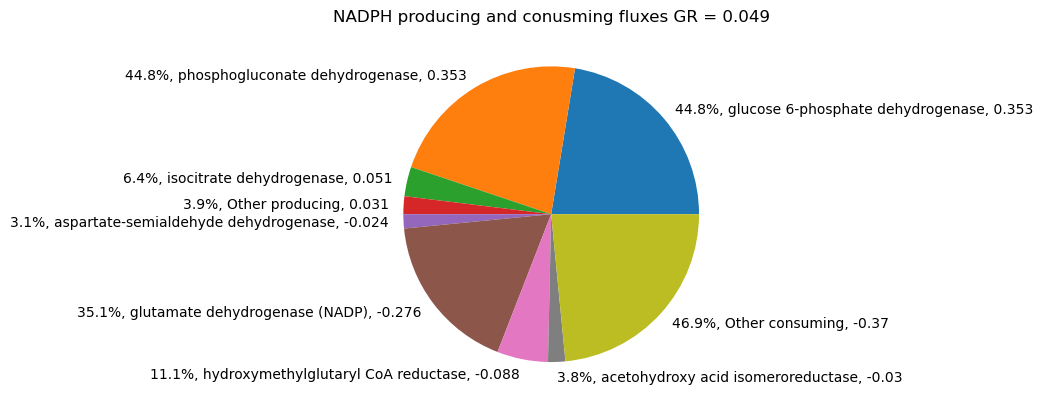

In [13]:
# Make a pie plot for napdh
threshold = 0.02 # threshold for including reaction in 'others' in pie chart
title = f'NADPH producing and conusming fluxes GR = {growth_rates[0]}'
producing_nadph_fluxes_lowest_GR_pie_chart = cofactor_fluxes_pie_chart(nadph_fluxes_lowest_GR, title, threshold)
producing_nadph_fluxes_lowest_GR_pie_chart


([<matplotlib.patches.Wedge at 0x2bbf1724e60>,
 [Text(0.8382701702188886, 0.7122521475721892, '44.8%, glucose 6-phosphate dehydrogenase, 2.17'),
  Text(-0.5675383395259054, 0.9422845818372378, '44.8%, phosphogluconate dehydrogenase, 2.17'),
  Text(-1.0727054210139169, 0.2435222366178409, '6.4%, isocitrate dehydrogenase, 0.312'),
  Text(-1.0979513554079763, 0.06710306369896989, '3.9%, Other producing, 0.188'),
  Text(-1.0986972034484488, -0.05352060476637399, '3.1%, aspartate-semialdehyde dehydrogenase, -0.15'),
  Text(-0.8767111768162231, -0.6643624857301272, '35.1%, glutamate dehydrogenase (NADP), -1.698'),
  Text(-0.21467273155073704, -1.0788492101904443, '11.1%, hydroxymethylglutaryl CoA reductase, -0.539'),
  Text(0.04137142003095354, -1.099221727225505, '3.8%, acetohydroxy acid isomeroreductase, -0.183'),
  Text(0.8145619661340849, -0.7392488101632454, '46.9%, Other consuming, -2.271')])

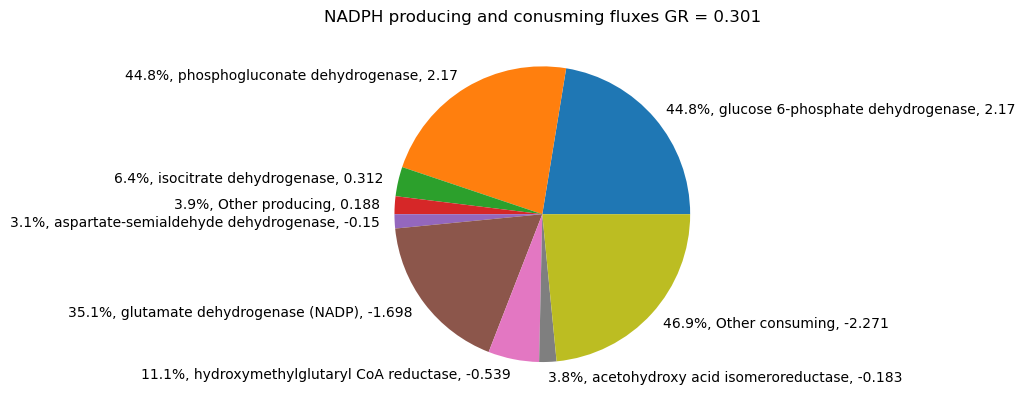

In [14]:
# Make a pie plot for napdh
threshold = 0.02 # threshold for including reaction in 'others' in pie chart
title = f'NADPH producing and conusming fluxes GR = {growth_rates[5]}'
producing_nadph_fluxes_highest_GR_pie_chart = cofactor_fluxes_pie_chart(nadph_fluxes_highest_GR, title, threshold)
producing_nadph_fluxes_highest_GR_pie_chart


([<matplotlib.patches.Wedge at 0x2bbf86c6c30>,
 [Text(1.0396384139356853, 0.35937719497666054, '21.2%, glyceraldehyde-3-phosphate dehydrogenase, 0.831'),
  Text(0.7140018758530041, 0.836780330360598, '12.7%, glycine-cleavage complex (lipoamide), 0.496'),
  Text(0.33115240951919955, 1.0489700099000108, '12.8%, isocitrate dehydrogenase (NAD+), 0.504'),
  Text(-0.45729600608376314, 1.000440084572704, '33.9%, malate dehydrogenase, 1.33'),
  Text(-0.9487592538066097, 0.5566469961441678, '5.0%, Other producing, 0.197'),
  Text(-1.072049236629955, 0.24639487462431256, '14.4%, pyruvate dehydrogenase, 0.564'),
  Text(-1.030862898716137, -0.38382506959624674, '22.7%, malate dehydrogenase, -0.89'),
  Text(0.36589550134104326, -1.037362271387574, '76.2%, NADH:ubiquinone oxidoreductase (complex I), -2.989'),
  Text(1.0998346774519243, -0.019070455532621523, '1.1%, Other consuming, -0.043')])

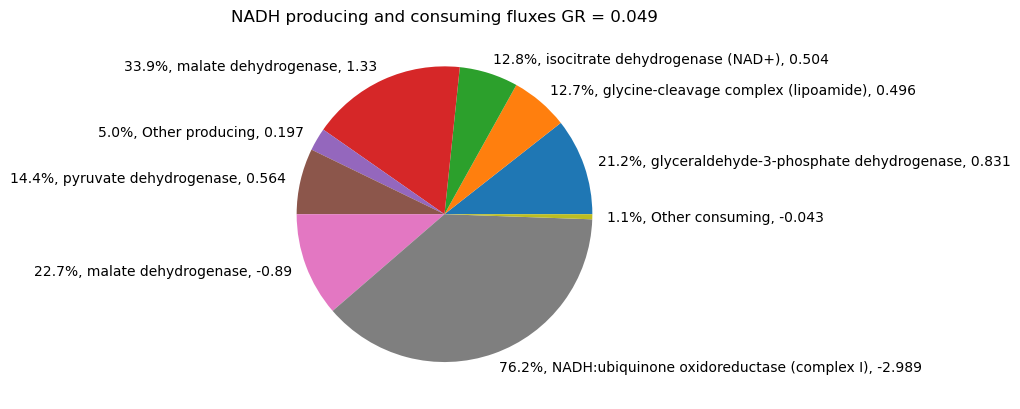

In [15]:
# Make a pie plot for nadh 
threshold = 0.02 # threshold for including reaction in group 'others' in pie chart
title = f'NADH producing and consuming fluxes GR = {growth_rates[0]}'
producing_nadh_fluxes_lowest_GR_pie_chart = cofactor_fluxes_pie_chart(nadh_fluxes_lowest_GR, title, threshold)
producing_nadh_fluxes_lowest_GR_pie_chart

([<matplotlib.patches.Wedge at 0x2bbec05d160>,
 [Text(1.0373688101430802, 0.36587696257393687, '21.6%, glyceraldehyde-3-phosphate dehydrogenase, 4.78'),
  Text(0.708158163459516, 0.841731557876765, '12.3%, glycine-cleavage complex (lipoamide), 2.724'),
  Text(0.33521661005424164, 1.0476783019342066, '12.5%, isocitrate dehydrogenase (NAD+), 2.771'),
  Text(-0.44891662904625734, 1.0042279921241717, '34.0%, malate dehydrogenase, 7.521'),
  Text(-0.9177236476103273, 0.6064514049920208, '2.1%, malic enzyme (NAD), 0.465'),
  Text(-0.9662691259278499, 0.525665270184962, '3.4%, Other producing, 0.743'),
  Text(-1.0728232320821929, 0.2430027010235016, '14.2%, pyruvate dehydrogenase, 3.14'),
  Text(-1.0276259277792867, -0.39240916471937864, '23.2%, malate dehydrogenase, -5.142'),
  Text(0.3729537012724317, -1.0348456583989682, '75.6%, NADH:ubiquinone oxidoreductase (complex I), -16.736'),
  Text(1.0998042623916153, -0.020750528312190517, '1.2%, Other consuming, -0.266')])

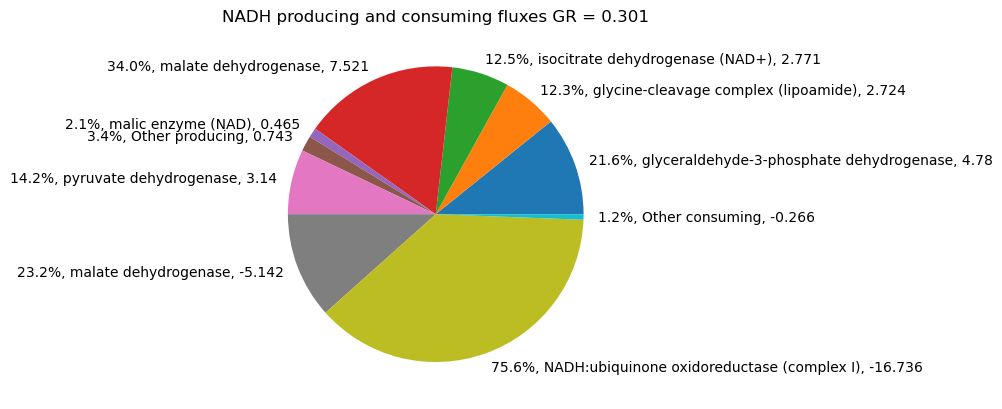

In [16]:
# Make a pie plot for nadh 
threshold = 0.02 # threshold for including reaction in group 'others' in pie chart
title = f'NADH producing and consuming fluxes GR = {growth_rates[5]}'
producing_nadh_fluxes_highest_GR_pie_chart = cofactor_fluxes_pie_chart(nadh_fluxes_highest_GR, title, threshold)
producing_nadh_fluxes_highest_GR_pie_chart


([<matplotlib.patches.Wedge at 0x2bbf4788380>,
 [Text(1.0993113249882118, 0.03891800036823749, '2.3%, acetate kinase, 0.27'),
  Text(0.2215919293465054, 1.0774493105703364, '82.6%, ATP synthase, 9.907'),
  Text(-0.9921636336304344, 0.4749856040989594, '1.9%, Other producing, 0.229'),
  Text(-1.0483276656987615, 0.33318028952893647, '6.9%, phosphoglycerate kinase, 0.831'),
  Text(-1.0945643551075064, 0.10921937798801631, '6.3%, pyruvate kinase, 0.76'),
  Text(-1.0993113133736583, -0.038918328441527886, '2.3%, ATP citrate lyase, -0.27'),
  Text(-1.0939178282400217, -0.1155153022704548, '2.2%, adenylate kinase, -0.263'),
  Text(-1.0523807046647902, -0.32014817264704143, '9.9%, ATP maintenance requirement, -1.189'),
  Text(-0.054936186520229746, -1.0986273323609852, '68.1%, Biomass_Rt_Clim, -8.171'),
  Text(0.9844577195517132, -0.49075757601390185, '5.6%, hexokinase (D-glucose:ATP), -0.676'),
  Text(1.073569941016841, -0.2396822516272264, '9.8%, Other consuming, -1.179'),
  Text(1.09941325

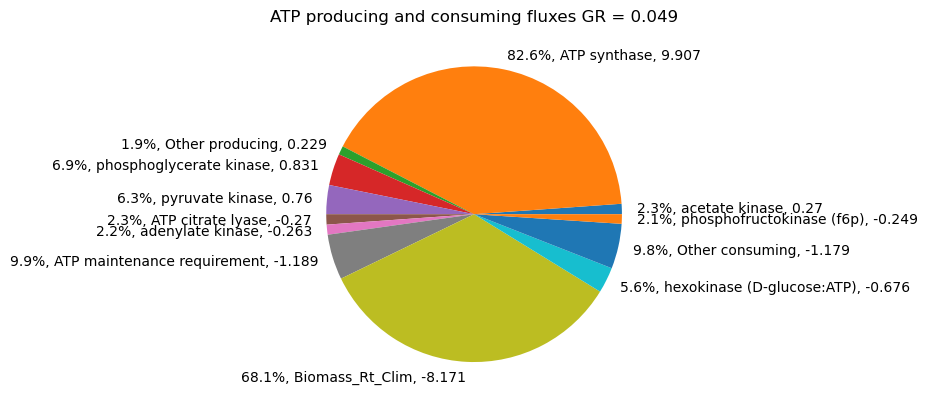

In [17]:
# Make a pie plot for atp 
threshold = 0.02 # threshold for including reaction in group 'others' in pie chart
title = f'ATP producing and consuming fluxes GR = {growth_rates[0]}'
producing_atp_fluxes_lowest_GR_pie_chart = cofactor_fluxes_pie_chart(atp_fluxes_lowest_GR, title,  threshold)
producing_atp_fluxes_lowest_GR_pie_chart

([<matplotlib.patches.Wedge at 0x2bbfb1245c0>,
 [Text(1.0991731391792698, 0.04264282010830838, '2.5%, acetate kinase, 1.66'),
  Text(0.2179628204313083, 1.0781893196046923, '82.4%, ATP synthase, 55.395'),
  Text(-0.9898860099825756, 0.47971417244102377, '1.6%, Other producing, 1.08'),
  Text(-1.0460797493703198, 0.34017224748254965, '7.1%, phosphoglycerate kinase, 4.78'),
  Text(-1.0943518602363682, 0.11132837013627866, '6.5%, pyruvate kinase, 4.341'),
  Text(-1.0991731399278653, -0.042642800812305336, '2.5%, ATP citrate lyase, -1.66'),
  Text(-1.0926986630234194, -0.12652917381707668, '2.4%, adenylate kinase, -1.615'),
  Text(-0.2673498339635715, -1.0670164320570001, '74.6%, Biomass_Rt_Clim, -50.193'),
  Text(0.9372719597997614, -0.5757788406785321, '5.9%, hexokinase (D-glucose:ATP), -3.988'),
  Text(1.0627849670541307, -0.2837042717403998, '12.5%, Other consuming, -8.43'),
  Text(1.0994370728653606, -0.03518696931035368, '2.0%, phosphofructokinase (f6p), -1.37')])

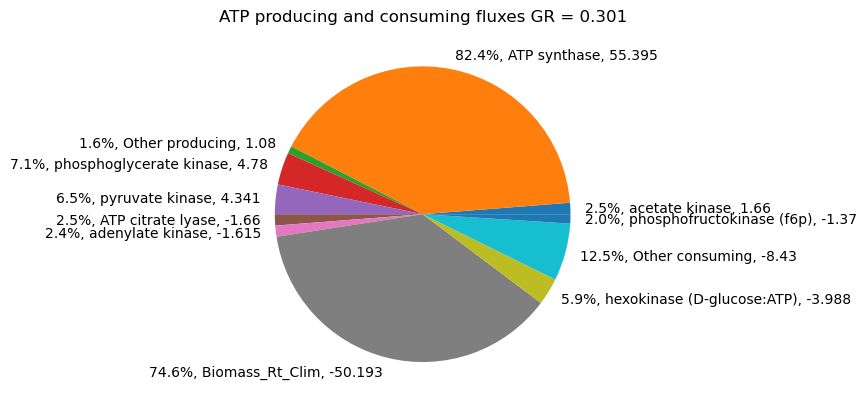

In [18]:
# Make a pie plot for atp 
threshold = 0.02 # threshold for including reaction in group 'others' in pie chart
title = f'ATP producing and consuming fluxes GR = {growth_rates[5]}'
producing_atp_fluxes_highest_GR_pie_chart = cofactor_fluxes_pie_chart(atp_fluxes_highest_GR, title,  threshold)
producing_atp_fluxes_highest_GR_pie_chart 

In [19]:
# # Get all cofactor balances to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\iRhto_results\\iRhto_forced_XPK_glc_max.xlsx') as excel_writer:
#     all_fluxes_glc_max.to_excel(excel_writer, sheet_name='Growth rate range 0.05-0.3', index=True)

In [20]:
# # Get cofactor data to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\iRhto_results\\iRhto_all_cofactor_fluxes_forced_XPK.xlsx') as excel_writer:
#     nadph_fluxes_lowest_GR.to_excel(excel_writer, sheet_name=f'NADPH fluxes, GR = {growth_rates[0]}', index=False)
#     nadph_fluxes_highest_GR.to_excel(excel_writer, sheet_name=f'NADPH fluxes, GR = {growth_rates[5]}', index=False)
#     nadh_fluxes_lowest_GR.to_excel(excel_writer, sheet_name=f'NADH fluxes, GR = {growth_rates[0]}', index=False)
#     nadh_fluxes_highest_GR.to_excel(excel_writer, sheet_name=f'NADH fluxes, GR = {growth_rates[5]}', index=False)
#     atp_fluxes_lowest_GR.to_excel(excel_writer, sheet_name=f'ATP fluxes, GR = {growth_rates[0]}', index=False)
#     atp_fluxes_highest_GR.to_excel(excel_writer, sheet_name=f'ATP fluxes, GR = {growth_rates[5]}', index=False)

    